# K-Means Clustering and Identifying the Roles of Major League Baseball Players

*The information used here was obtained free of charge from and is copyrighted by Retrosheet. Interested parties may contact Retrosheet at "www.retrosheet.org".*


# 1. Introduction

Baseball, like most other sports, has a finite number of roles that players fulfill. Pitchers, position players, starters, and bench players are perhaps the most fundamental definitions of such roles. Drilling down further, relief pitchers, closers, pinch hitters, utility players, etc. are specializations that subdivide these four fundamental roles and having this information is useful in any number of analytical exercises. Major League Baseball (MLB) does not, however, explicitly define such roles nor does it attempt to identify what role a player might have. To the extent that this does occur, it is left to the teams coaching staff and front office as part of the game strategy to maximize the teams winning potential. 

MLB does record what position a player has on the field for each recorded event. Here, we must be clear about what we mean when we say role versus position. We define a role as a function served by a player in the context of a team's overall goal of maximizing the number of wins. So a role may be as simple as "starting pitcher" or "starting shortstop" and identifying the roles for such a player is a trivial task.

However, the task is not so trivial in most cases. A utility player, for instance, may play several positions competently and fill the position of a regular starter in case of injury or a need to rest. <a href="https://en.wikipedia.org/wiki/Ben_Zobrist">Ben Zobrist</a> is a well know example of such a utility player. Similarly, a team might decide to establish a rotation where three or more players cycle through two fielding positions and designated hitter (DH). <a href="https://en.wikipedia.org/wiki/Platoon_system">Platoon players</a> are another example of a role that encompasses more than just a single position.

Roles are not static, further complicating the task. Over brief time scales, roles may shift due to injury or roster changes. Season-to-season roles may change due to player development and physical limitations. Finally, long term changes in roles are caused by rule changes or shifts in game strategy. The concept of a role is, therefore, influenced by both internal and external factors that are difficult to generalize and impractical to assign manually for each player over the course of several seasons. 

Clustering is a tool that may assist in this task. Recall that K-means clustering is a method of partitioning the features space into $k$ clusters, or sets $S = \{S_1, S_2, ..., S_k\}$, such that all $n$ observations are assigned to the nearest cluster centroid, $\mu_i$. Formally, the problem is finding


$$ \underset{S}{\text{arg min}} \sum_{i=1}^{k} \sum_{x \in S_i} \|x-u_i\|^2
$$

where 

$$ \mu_i = \frac{1}{|S_i|} \sum_{x \in S_i} x
$$

A quick reference with respect to the important properties of K-means clustering can be found <a href="http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm#:~:text=The%20K%2DMeans%20method%20is,%2C%20non%2Ddeterministic%20and%20iterative.&text=There%20are%20always%20K%20clusters,and%20they%20do%20not%20overlap.">here</a>. 



# 2. Motivation

The purpose of this exercise is to understand how the parameterization of a k-means model if affected over time. Specifically, we would like to know how the parameters and diagnostic metrics of a model will change over a relatively short period. We are not concerned with developing the optimal k-means models Rather, we want to know if the parameters applied to a model for a given season can be independently applied to other seasons. 

The conclusions of this exercise will depend heavily on visual inspection of the diagnostic plots. If the results here are positive, a statistically rigorous analysis using A/B testing or ANOVA can be the subject of a follow up exercise. 

The data set consists of variables related to playing time from the 2007, 2013, and 2018 seasons. It was compiled from the Retrosheets scoring events table with additional information from game log tables and starting players table.

- *playerID*: Alpha-numeric code uniquely identifying  players.

- *gameID*: Alpha-numeric code uniquely identifying each game. 

- *batt_ev*: Indicator variable. Value of 1 if a player was the batter for the recorded event, 0 otherwise.

- *pitcher_ev*: Indicator variable. Value of 1 if a player was the pitcher for the recorded event, 0 otherwise.

- *defC_ev*: Indicator variable. Value of 1 if a player was the defensive catcher for the recorded event, 0 otherwise. 

- *defRF_ev*: Indicator variable. Value of 1 if a player was the defensive right fielder for the recorded event, 0 otherwise. 

- *def1B_ev*: Indicator variable. Value of 1 if a player was the defensive first baseman for the recorded event, 0 otherwise.  

- *def3B_ev*: Indicator variable. Value of 1 if a player was the defensive third baseman for the recorded event, 0 otherwise.  

- *def2B_ev*: Indicator variable. Value of 1 if a player was the defensive second baseman for the recorded event, 0 otherwise.

- *defLF_ev*: Indicator variable. Value of 1 if a player was the defensive left fielder for the recorded event, 0 otherwise.

- *defSS_ev*: Indicator variable. Value of 1 if a player was the defensive shortstop for the recorded event, 0 otherwise. 

- *defCF_ev*: Indicator variable. Value of 1 if a player was the defensive third baseman for the recorded event, 0 otherwise.

- *start_C*: Indicator variable. Value of 1 if a player was the starting defensive catcher for the game, 0 otherwise.

- *start_P*: Indicator variable. Value of 1 if a player was the starting defensive pitcher for the game, 0 otherwise. 

- *start_DH*: Indicator variable. Value of 1 if a player was the starting designated hitter for the game, 0 otherwise. 

- *start_1B*: Indicator variable. Value of 1 if a player was the starting defensive first baseman for the game, 0 otherwise. 

- *start_CF*: Indicator variable. Value of 1 if a player was the starting defensive center fielder for the game, 0 otherwise.

- *start_LF*: Indicator variable. Value of 1 if a player was the starting defensive left fielder for the game, 0 otherwise.

- *start_SS*: Indicator variable. Value of 1 if a player was the starting defensive shortstop for the game, 0 otherwise.

- *start_3B*: Indicator variable. Value of 1 if a player was the starting defensive third baseman for the game, 0 otherwise.

- *start_RF*: Indicator variable. Value of 1 if a player was the starting defensive right fielder for the game, 0 otherwise.

- *start_2B*: Indicator variable. Value of 1 if a player was the starting defensive second baseman for the game, 0 otherwise. 

- *pinchHit_ev*: Indicator variable. Value of 1 if a player was pnch hitter for the recorded event, 0 otherwise.

- *removedForPH*: Indicator variable. Value of 1 if a player was removed for a pinch hitter for the recorded event, 0 otherwise. 

- *pinchRun_ev*: Indicator variable. Value of 1 if a player was a pinch runner for the recorded event, 0 otherwise. 

- *removedForPR*: Indicator variable. Value of 1 if a player was removed for a pinch runner for the recorded event, 0 otherwise. 

- *save*: Indicator variable. Value of 1 if a player was awarded a save for the game, 0 otherwise. 


# 3. Analysis

## 3.1 Imports and Function Definitions

In [1]:
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, IFrame

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

import itertools

!pip install kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We define three conviencence functions.
1. Produce scree plots
2. Produce knife plots
3. Reconcile labels from independently scaled, transformed, and fitted models

In [2]:
# Fucntions

def screePlot(xIn,yIn,**kwargs):
    """
    Parameters
    ----------
    xIn : array-like
        xIn values for scree plot.
    yIn : array-like
        yIn values for scree plot.

    Returns
    -------
    Index of location of knee(s), max lift above reference, min index above threshold,
    and plot axes instance.
    """

    #unpack kwargs
    if 'curve' in kwargs.keys():
        C = kwargs['curve']
    else:
        C = 'convex'

    if 'direction' in kwargs.keys():
        D = kwargs['direction']
    else:
        D = 'decreasing'

    if 'threshold' in kwargs.keys():
        threshold = kwargs['threshold']
    else:
        threshold = 0.8


    # matrix
    M = np.array([xIn,yIn])

    #translate matrix to origin
    M_t = np.array([M[0,:]-M[0,0],M[1,:] - M[1,0]])

    # angle relative to x-axis
    theta = np.arctan2(yIn[-1]-yIn[0],xIn[-1]-xIn[0])

    #rotation matrix
    R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])

    # Matrix translated and rotated
    M_t_r = np.matmul(R,M_t)

    # Matrix translated, rotated, transposed
    M_t_r_t = np.transpose(M_t_r)

    # get indices of max lift
    ixLift = list(np.where(abs(M_t_r_t[:,1])==max(abs(M_t_r_t[:,1])))[0])
    lift = [xIn[i] for i in ixLift]

    # get indices of knee
    kneeL = KneeLocator(xIn,yIn, curve=C, direction=D)
    ixK = kneeL.knee
    knee = xIn[ixK]

    # get min index above threshold
    cumsumyIn = np.cumsum(yIn)/sum(yIn)
    ixThr = min([i for i in range(len(cumsumyIn)) if cumsumyIn[i]>threshold])
    thr = xIn[ixThr]

    _, ax = plt.subplots()

    #scree plot
    ax.plot(xIn,yIn)
    #plot endpoints
    ax.plot([xIn[0],xIn[-1]],[[yIn[0]],[yIn[-1]]],  '.--k',  alpha=0.5)

    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())

    # add point at max lift
    for i in ixLift:
        ax.scatter(xIn[i],yIn[i])

    # add knee
    ax.scatter(xIn[ixK],yIn[ixK])

    #add threshold
    ax.scatter(xIn[ixThr],yIn[ixThr])

    ixDict = {'maxLift':lift,   'knee':knee,   'threshold':thr}

    return(ixDict, ax)

def knifePlot(X, KMeansModel, ax0):
    """
    Parameters
    ----------
    X : Numpy array
        Feature array.
    KMeansModel : Object
        K-means model.
    ax0 : Object
        Matplotlib pyplot axis instance.

    Returns
    -------
    ax0 as a knife plot.

    """

    groupLabels = KMeansModel.labels_

    meanSilhouetteScore = silhouette_score(X, groupLabels)

    dfSilhouetteScores = pd.DataFrame()
    dfSilhouetteScores['labels'] =  KMeansModel.labels_
    dfSilhouetteScores['samples'] = silhouette_samples(X, groupLabels)
    dfSilhouetteScores['labelcounts'] = dfSilhouetteScores['labels'].map(dfSilhouetteScores['labels'].value_counts())
    dfSilhouetteScores = dfSilhouetteScores.sort_values(['labelcounts','samples'], ignore_index=True)

    colorList=['tab:blue','tab:orange','tab:green','tab:red',
               'tab:purple','tab:brown','tab:pink','tab:gray',
               'tab:olive','tab:cyan']

    for i in dfSilhouetteScores.index:
        ax0.plot([0,dfSilhouetteScores.loc[i,'samples']],[i,i],
                 color=colorList[dfSilhouetteScores.loc[i,'labels']],
                 alpha=0.10)
    ax0.axvline(meanSilhouetteScore,
                color='r',
                linestyle='dotted',
                alpha=0.75)

    textList = [(0,int(np.mean([i for i in dfSilhouetteScores[dfSilhouetteScores['labels']==g].index])),g) for g in set(groupLabels)]
    for e in textList:
        ax0.text(e[0],e[1],f'Grp {e[2]}')

    ax0.set_yticks([])
    ax0.set_xlabel('Silhouette Score')
    legendLabelText =f'Silhouette Score\nMean={round(meanSilhouetteScore,3)}\n{len(groupLabels)} Samples'
    ax0.legend(handles=[mpl.lines.Line2D([0],[0],
                                         ls='dotted',
                                         color='r',
                                         label=legendLabelText)],
               loc='upper right')

    return(ax0)

def reconcileLabels(dfA, dfB):
    """
    Parameters
    ----------
    dfA : Pandas DataFrame
        Dataframe, with group labels, for use a reference.
    dfB : Pandas DataFrame
        Dataframe, with group labels, to be altered.

    Returns
    -------
    Dictionary that maps new dfB labels to dfA labels.
    
    This function attempts to reconcile the group labels of two independently 
    fitted K-means models with the same parameterization by minmizing the angle
    between pairs of group means. 

    """

    dfA = dfA.groupby(['labels']).mean(numeric_only=True)    
    dfB = dfB.groupby(['labels']).mean(numeric_only=True)
    
    # treat each row as a vector
    # find max cos(theta) between each (= min angle)
    labelMapDict = {}
    usedList = []
    for i in dfA.index:
        cosTheta = []
        for j in dfB.index:
            if j in usedList:
                cosTheta.append(-np.inf)
            else:
                cosTheta.append(np.dot(dfA.loc[i],dfB.loc[j])/(np.linalg.norm(dfA.loc[i])*np.linalg.norm(dfB.loc[j])))
        
        labelMapDict[cosTheta.index(max(cosTheta))] = i
        usedList.append(cosTheta.index(max(cosTheta)))
    
    return(labelMapDict)


## 3.2 Load Data

In [3]:
df0 = pd.read_csv('https://raw.githubusercontent.com/cmtoner/retrosheets-Clustering/main/rs_playing_time_2007.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/cmtoner/retrosheets-Clustering/main/rs_playing_time_2013.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/cmtoner/retrosheets-Clustering/main/rs_playing_time_2018.csv')

## 3.3 Scaling and Dimension Reduction

K-means clustering relies on distance measurements, so the data set will need to be scaled. The number of features can be reduced by fitting the models to the principal components of the scaled data set. We will transform the data by three different methods. 

1. Independently.
2. Reference to the 2007 data. Transform all three seasons with respect to the fit of the 2007. 
3. Combined. The data will be concatenated and transformed as a single block




### 3.3.1 Independently

Scale and transform the data into principal components independently for each season and compare scree plots. The plots look remarkably similar, notwithstanding the calculated knee point.

<Figure size 1080x864 with 0 Axes>

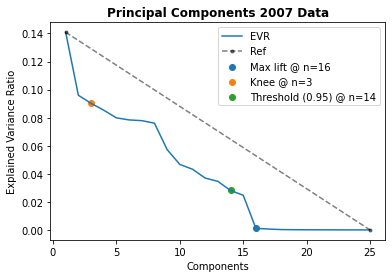

<Figure size 1080x864 with 0 Axes>

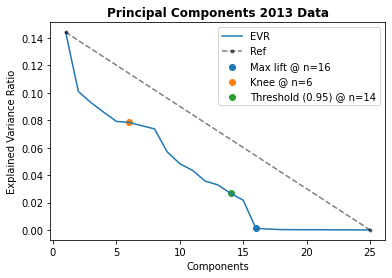

<Figure size 1080x864 with 0 Axes>

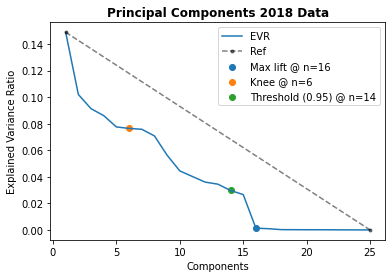

In [4]:
# method 1: Scale and transform data independently by year
# store results in dsDictI ("dataset dictionary - independent")
# 
# df0
dsDictI ={}

dsDictI[2007] = {'df':df0,
                'dfGrouped':df0.groupby(['playerID'], as_index=True).mean(numeric_only=True)}
dsDictI[2007]['dfGroupedScaled'] = StandardScaler().fit(dsDictI[2007]['dfGrouped']).transform(dsDictI[2007]['dfGrouped'])
dsDictI[2007]['pcFit'] = PCA(n_components=np.shape(dsDictI[2007]['dfGroupedScaled'])[1]).fit(dsDictI[2007]['dfGroupedScaled'])
dsDictI[2007]['pcTransform'] = dsDictI[2007]['pcFit'].transform(dsDictI[2007]['dfGroupedScaled'])

# df1
dsDictI[2013] = {'df':df1,
                'dfGrouped':df1.groupby(['playerID'], as_index=True).mean(numeric_only=True)}
dsDictI[2013]['dfGroupedScaled'] = StandardScaler().fit(dsDictI[2013]['dfGrouped']).transform(dsDictI[2013]['dfGrouped'])
dsDictI[2013]['pcFit'] = PCA(n_components=np.shape(dsDictI[2013]['dfGroupedScaled'])[1]).fit(dsDictI[2013]['dfGroupedScaled'])
dsDictI[2013]['pcTransform'] = dsDictI[2013]['pcFit'].transform(dsDictI[2013]['dfGroupedScaled'])

# df2
dsDictI[2018] = {'df':df2,
                'dfGrouped':df2.groupby(['playerID'], as_index=True).mean(numeric_only=True)}
dsDictI[2018]['dfGroupedScaled'] = StandardScaler().fit(dsDictI[2018]['dfGrouped']).transform(dsDictI[2018]['dfGrouped'])
dsDictI[2018]['pcFit'] = PCA(n_components=np.shape(dsDictI[2018]['dfGroupedScaled'])[1]).fit(dsDictI[2018]['dfGroupedScaled'])
dsDictI[2018]['pcTransform'] = dsDictI[2018]['pcFit'].transform(dsDictI[2018]['dfGroupedScaled'])


for season in dsDictI.keys():

    # get scree plots of PCs
    fig = plt.figure(figsize=(15,12))
    
    # pc0
    Y = list(dsDictI[season]['pcFit'].explained_variance_ratio_)
    X = list(range(1,len(Y)+1,1))
    
    # Scree plot of PC0
    screePoints, ax = screePlot(X,Y, threshold=0.95)
    dsDictI[season]['screePoints'] = screePoints
    ax.set_xlabel('Components')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title(f'Principal Components {season} Data', fontweight='bold')
    # add legend
    legList = ['EVR','Ref']+[f'Max lift @ n={i}' for i in screePoints['maxLift']]
    legList += [f'Knee @ n={screePoints["knee"]}']
    legList += [f'Threshold (0.95) @ n={screePoints["threshold"]}']
    ax.legend(legList)


del(ax,legList,X,Y,fig)
del(season, screePoints)


Produce a pair plot of the first six principal components for each year. The plot has a number of reflections and rotations that misalign the plots for each year. Principal component analysis (PCA) calculates linear combinations of the features so that the first PC maintains the highest variance. This implies that the orientation of the PCs scatter plot is subject to the variance of the features by year. The result is a similar overall shape in the scatter plots, but with rotations and reflections. 

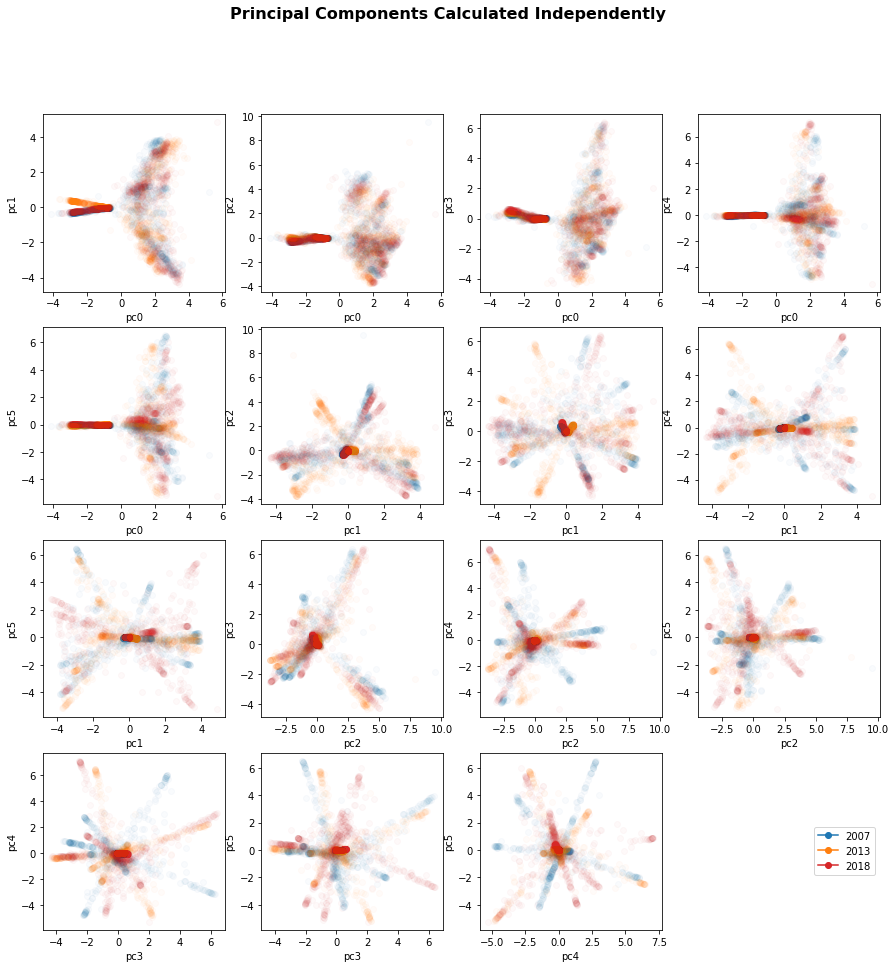

In [5]:
# plot pairwise combinations of PCs 
# note similar shapes, but often rotated.reflected
fig = plt.figure(figsize=(15,15),tight_layout=False)
fig.suptitle('Principal Components Calculated Independently',
             fontweight='bold',
             fontsize=16)

axes = [fig.add_subplot(4,4,i) for i in range(1,16,1)]
alf = 0.025

for i,(c0,c1) in enumerate(itertools.combinations(range(6),2)):
    # 2007 PCs
    x = dsDictI[2007]['pcTransform'][:,c0]
    y = dsDictI[2007]['pcTransform'][:,c1]    
    axes[i].scatter(x,y,color='tab:blue',alpha=alf)
    # 2013 PCs
    x = dsDictI[2013]['pcTransform'][:,c0]
    y = dsDictI[2013]['pcTransform'][:,c1]    
    axes[i].scatter(x,y,color='tab:orange',alpha=alf)
    # 2007 PCs
    x = dsDictI[2018]['pcTransform'][:,c0]
    y = dsDictI[2018]['pcTransform'][:,c1]    
    axes[i].scatter(x,y,color='tab:red',alpha=alf)
    
    axes[i].set_xlabel(f'pc{c0}')
    axes[i].set_ylabel(f'pc{c1}')
    
fig.legend(handles = [mpl.lines.Line2D([0],[0],color='tab:blue',marker='o',label='2007'),
                      mpl.lines.Line2D([0],[0],color='tab:orange',marker='o',label='2013'),
                      mpl.lines.Line2D([0],[0],color='tab:red',marker='o',label='2018')],
           bbox_to_anchor=(0.90,0.225))
    
del(c0,c1,alf,axes,fig,i,x,y)

### 3.3.2 Keyed to 2007 Season

Here, we calculate the PCs based on the fit of a single season, in case the 2007 season. This eliminates the problem with rotations and reflections observed in the previous section. The plots look much better with no obvious discrepancies amongst the seasons. 

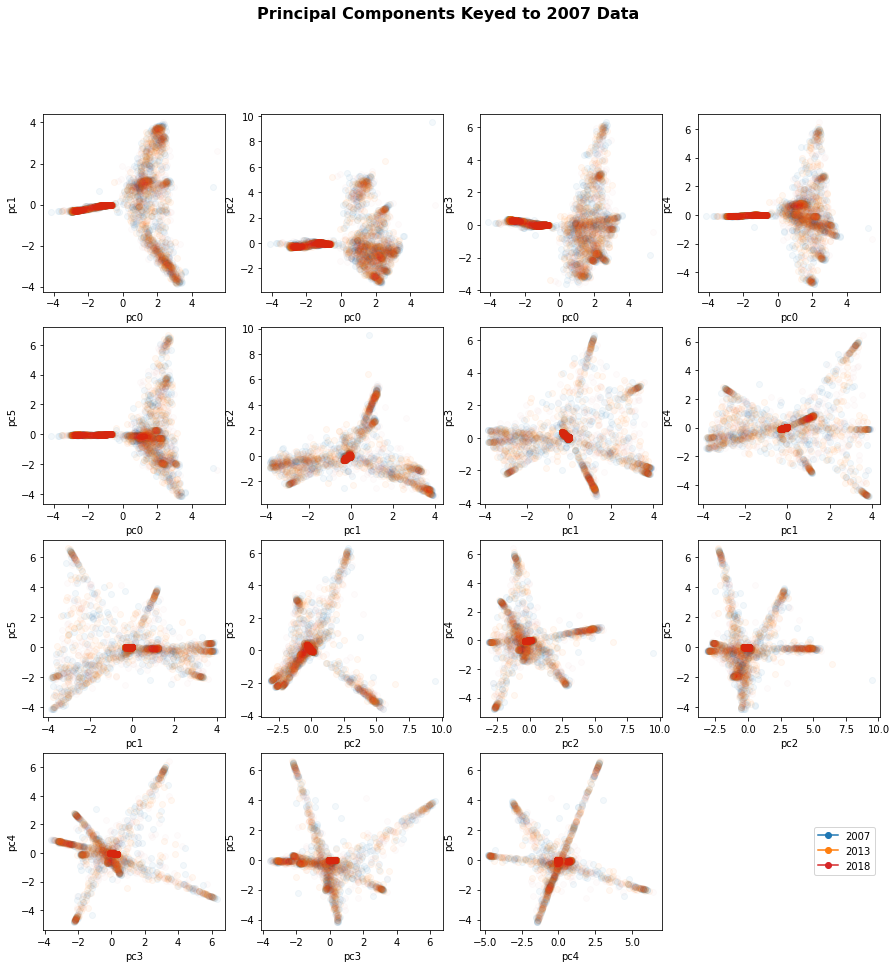

In [6]:
# method 2: key everything to 2007 data
# df0
dsDictK ={}

dsDictK[2007] = {'df':df0,
                'dfGrouped':df0.groupby(['playerID'], as_index=True).mean(numeric_only=True)}
dsDictK[2007]['dfGroupedScaled'] = StandardScaler().fit(dsDictK[2007]['dfGrouped']).transform(dsDictK[2007]['dfGrouped'])
dsDictK[2007]['pcFit'] = PCA(n_components=np.shape(dsDictK[2007]['dfGroupedScaled'])[1]).fit(dsDictK[2007]['dfGroupedScaled'])
dsDictK[2007]['pcTransform'] = dsDictK[2007]['pcFit'].transform(dsDictK[2007]['dfGroupedScaled'])

# df1
dsDictK[2013] = {'df':df1,
                'dfGrouped':df1.groupby(['playerID'], as_index=True).mean(numeric_only=True)}
dsDictK[2013]['dfGroupedScaled'] = StandardScaler().fit(dsDictK[2007]['dfGrouped']).transform(dsDictK[2013]['dfGrouped'])
dsDictK[2013]['pcFit'] = PCA(n_components=np.shape(dsDictK[2013]['dfGroupedScaled'])[1]).fit(dsDictK[2007]['dfGroupedScaled'])
dsDictK[2013]['pcTransform'] = dsDictK[2013]['pcFit'].transform(dsDictK[2013]['dfGroupedScaled'])

# df2
dsDictK[2018] = {'df':df2,
                'dfGrouped':df2.groupby(['playerID'], as_index=True).mean(numeric_only=True)}
dsDictK[2018]['dfGroupedScaled'] = StandardScaler().fit(dsDictK[2007]['dfGrouped']).transform(dsDictK[2018]['dfGrouped'])
dsDictK[2018]['pcFit'] = PCA(n_components=np.shape(dsDictK[2018]['dfGroupedScaled'])[1]).fit(dsDictK[2007]['dfGroupedScaled'])
dsDictK[2018]['pcTransform'] = dsDictK[2018]['pcFit'].transform(dsDictK[2018]['dfGroupedScaled'])


# plot pairwise combinations of PCs 
# much better results
fig = plt.figure(figsize=(15,15),tight_layout=False)
fig.suptitle('Principal Components Keyed to 2007 Data',
             fontweight='bold',
             fontsize=16)

axes = [fig.add_subplot(4,4,i) for i in range(1,16,1)]
alf = 0.05

for i,(c0,c1) in enumerate(itertools.combinations(range(6),2)):
    # 2007 PCs
    x = dsDictK[2007]['pcTransform'][:,c0]
    y = dsDictK[2007]['pcTransform'][:,c1]    
    axes[i].scatter(x,y,color='tab:blue',alpha=alf)
    # 2013 PCs
    x = dsDictK[2013]['pcTransform'][:,c0]
    y = dsDictK[2013]['pcTransform'][:,c1]    
    axes[i].scatter(x,y,color='tab:orange',alpha=alf)
    # 2007 PCs
    x = dsDictK[2018]['pcTransform'][:,c0]
    y = dsDictK[2018]['pcTransform'][:,c1]    
    axes[i].scatter(x,y,color='tab:red',alpha=alf/3)
    
    axes[i].set_xlabel(f'pc{c0}')
    axes[i].set_ylabel(f'pc{c1}')
    
fig.legend(handles = [mpl.lines.Line2D([0],[0],color='tab:blue',marker='o',label='2007'),
                      mpl.lines.Line2D([0],[0],color='tab:orange',marker='o',label='2013'),
                      mpl.lines.Line2D([0],[0],color='tab:red',marker='o',label='2018')],
           bbox_to_anchor=(0.90,0.225))
    
del(c0,c1,alf,axes,fig,i,x,y)


### 3.3.3 Combined

Here, we combine the three data sets prior the scaling and transforming. This also eliminates the possibility of rotations and reflections, but is less convenient in that fitting new data requires refitting old data. The good news is that the results do not appear to be significantly better than fitting everything to the 2007 data.

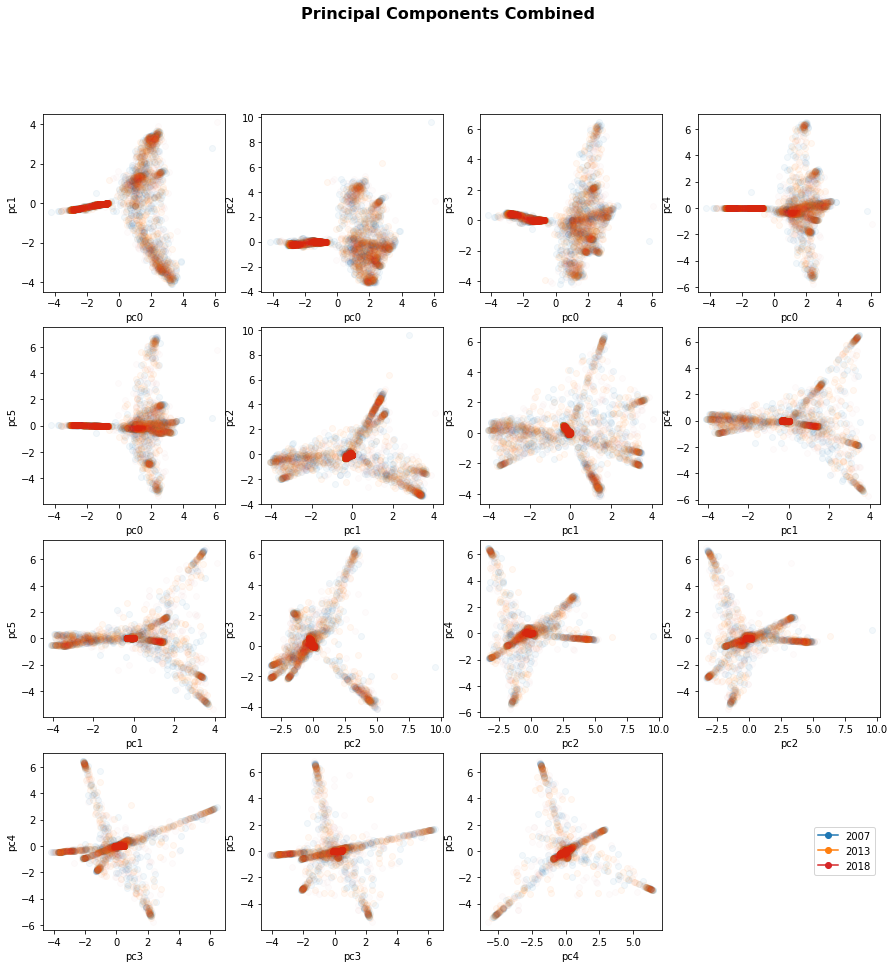

In [7]:
# method 3: Combine all data and transform together
# Similar results from method 2 to method 3
dsDictC ={}

dftemp0 = df0.copy()
dftemp0['season'] = 2007

dftemp1 = df1.copy()
dftemp1['season'] = 2013

dftemp2 = df2.copy()
dftemp2['season'] = 2018

dsDictC['df'] = pd.concat([dftemp0,dftemp1,dftemp2], axis=0)
del(dftemp0,dftemp1,dftemp2)

dsDictC['dfGrouped'] = dsDictC['df'].groupby(['playerID','season'],as_index=True).mean(numeric_only=True)
dsDictC['dfGroupedScaled'] = StandardScaler().fit(dsDictC['dfGrouped']).transform(dsDictC['dfGrouped'])
dsDictC['pcFit'] = PCA(n_components=np.shape(dsDictC['dfGroupedScaled'])[1]).fit(dsDictC['dfGroupedScaled'])
dsDictC['dfPCAll'] = pd.DataFrame(dsDictC['pcFit'].transform(dsDictC['dfGroupedScaled']))
dsDictC['dfPCAll'].index = dsDictC['dfGrouped'].index
dsDictC['dfPCAll'].columns = [f'pc{i}' for i in dsDictC['dfPCAll'].columns]

# plot pairwise combinations of PCs 
# much better results
fig = plt.figure(figsize=(15,15),tight_layout=False)
fig.suptitle('Principal Components Combined',
             fontweight='bold',
             fontsize=16)

axes = [fig.add_subplot(4,4,i) for i in range(1,16,1)]
alf = 0.05

for i,(c0,c1) in enumerate(itertools.combinations(dsDictC['dfPCAll'].columns[:6],2)):
    # 2007 PCs
    x = dsDictC['dfPCAll'].loc[[i for i in dsDictC['dfPCAll'].index if i[1]==2007],c0]
    y = dsDictC['dfPCAll'].loc[[i for i in dsDictC['dfPCAll'].index if i[1]==2007],c1]    
    axes[i].scatter(x,y,color='tab:blue',alpha=alf)
    # 2013 PCs
    x = dsDictC['dfPCAll'].loc[[i for i in dsDictC['dfPCAll'].index if i[1]==2013],c0]
    y = dsDictC['dfPCAll'].loc[[i for i in dsDictC['dfPCAll'].index if i[1]==2013],c1]
    axes[i].scatter(x,y,color='tab:orange',alpha=alf)
    # 2007 PCs
    x = dsDictC['dfPCAll'].loc[[i for i in dsDictC['dfPCAll'].index if i[1]==2018],c0]
    y = dsDictC['dfPCAll'].loc[[i for i in dsDictC['dfPCAll'].index if i[1]==2018],c1]
    axes[i].scatter(x,y,color='tab:red',alpha=alf/3)
    
    axes[i].set_xlabel(c0)
    axes[i].set_ylabel(c1)
    
fig.legend(handles = [mpl.lines.Line2D([0],[0],color='tab:blue',marker='o',label='2007'),
                      mpl.lines.Line2D([0],[0],color='tab:orange',marker='o',label='2013'),
                      mpl.lines.Line2D([0],[0],color='tab:red',marker='o',label='2018')],
           bbox_to_anchor=(0.90,0.225))
    
del(c0,c1,alf,axes,fig,i,x,y)

Keyed and combined plots are remarkably similar. We will use the keyed data from this point forward for the sake of convenience.

In [8]:
# similar results from method 2 to method 3 
# will use method 2 for convenience

del(dsDictC, dsDictI)

## 3.4 Grid Search

Perform a grid search of the parameter space using the data keyed to the 2007 season (Section 3.3.2). We will include the number of PCs used to fit a model as a parameter in the search. We will record the following metrics:

1. Inertia, i.e., the within cluster sum of square distance from the nearest centroid.
2. Silhouette score. A measure of how well each point has been classified (<a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">details here</a>).
3. Silhouette score minus (scaled) inertia, denoted SSmI.

SSmI is an ad hoc metric that attempts to find the model with the biggest proportional difference between inertia and silhouette score. A good model has a high silhouette score and low inertia, but the inertia will approach zero as the number of clusters approaches the number of samples. Similarly, the silhouette score will increase with the number of clusters, but the trend is less predictable. By putting the two metrics on the same scale and finding the difference, we are attempting to account for these tendencies and arrive at the best model.

In [9]:
# perform gridsearch

# add dfPC to dsDictK
for s in dsDictK.keys():
    dsDictK[s]['dfPC'] = pd.DataFrame(dsDictK[s]['pcTransform'])
    dsDictK[s]['dfPC'].index = dsDictK[s]['dfGrouped'].index
    dsDictK[s]['dfPC'].columns = [f'pc{i}' for i in range(np.shape(dsDictK[s]['pcTransform'])[1])]
del(s)

# store search results
gsRes = pd.DataFrame(columns=['dataset','n_features','K','inertia','sil_score','n_iter'])

nFeat = range(3,17,1)
nClust = range(3,13,1)
#perform search
ix = 0
for nF in nFeat:
    print(f'{ix+1} of 420')
    for K in nClust:
        for s in dsDictK.keys():            
            dfTemp = dsDictK[s]['dfPC'].iloc[:,:nF]            
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(dfTemp)
            s_score = silhouette_score(dfTemp,
                                       kmTemp.labels_)
            gsRes.loc[ix] = [s,nF,K,kmTemp.inertia_,s_score,kmTemp.n_iter_]
            ix += 1
    

gsRes['SSSc'] = (gsRes['sil_score']-gsRes['sil_score'].min())/(gsRes['sil_score'].max()-gsRes['sil_score'].min())
gsRes['inertiaSc'] = (gsRes['inertia']-gsRes['inertia'].min())/(gsRes['inertia'].max()-gsRes['inertia'].min())
gsRes['SSmI'] = gsRes['SSSc'] - gsRes['inertiaSc']

del(nFeat, nClust, ix, kmTemp, nF, K,s, s_score)
del(dfTemp)

1 of 420
31 of 420
61 of 420
91 of 420
121 of 420
151 of 420
181 of 420
211 of 420
241 of 420
271 of 420
301 of 420
331 of 420
361 of 420
391 of 420


Plot results of grid search. We are looking for any obvious discrepancies in the model scores by year. Again, our goal here is to determine how consistent the parameterization of the models are over a given time interval and now how to develop the best model.

Although not exact 1:1 matches, the plots are quite similar. This implies that the parameters of a model from a single season will generate similar relative performance when applied to other seasons.

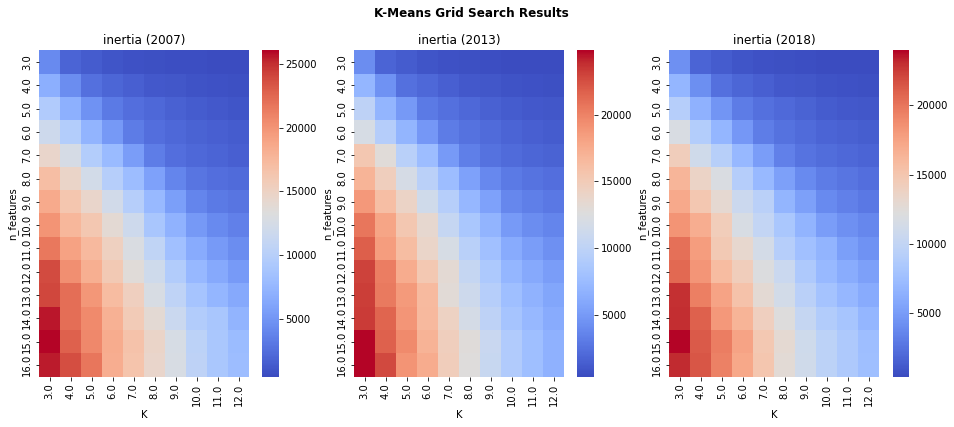

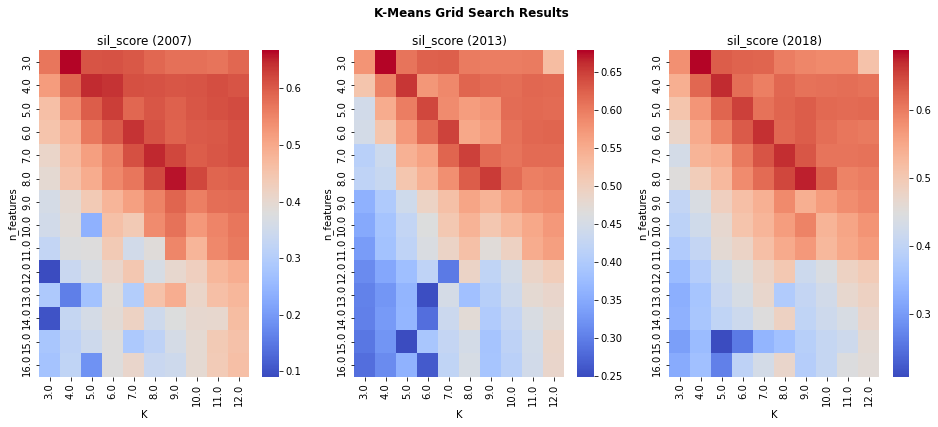

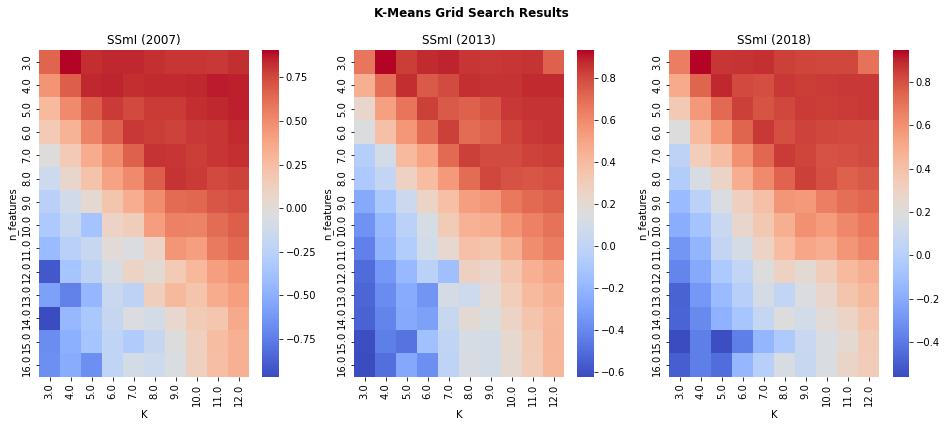

In [10]:
# heatmap of results by metric and season
metrics  = ['inertia', 'sil_score','SSmI']
seasons = [2007,2013,2018]

for metric in metrics:
    fig = plt.figure(figsize=(16,6))
    fig.suptitle('K-Means Grid Search Results',
                  fontweight='bold')
    for i, season in enumerate(seasons):
        ax0 = fig.add_subplot(1,3,i+1)
        sns.heatmap(gsRes[gsRes['dataset']==season].pivot(index='n_features',
                                                          columns='K',
                                                          values=metric),
                    ax=ax0,
                    cmap='coolwarm')
        ax0.set_title(f'{metric} ({season})')

del(fig, ax0, i)
del(metric, season)

## 3.5 Compare Knife Plots

### 3.5.1 Best Models

Here, we extract the best model parameters for each metric and refit the models. Store the results in the dictionary *kmDict*.


In [11]:
# Extract the best model parameters for each metric and refit the models
# store results in a dictionary

kmDict = {}
key = 0

for K in [4,6,8,10]:
    for s in seasons:
        # best inertia
        ix = gsRes[(gsRes['dataset']==s)&(gsRes['K']==K)]['inertia'].idxmin()

        if s=='2007':
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)
        elif s=='2013':
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)
        else:
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)

        kmDict[key] = {'season':s,
                      'metric':'inertia',
                      'K':K,
                      'nFeat':nF,
                      'X':X,
                      'model':kmTemp}
        key += 1

        # best sil_score
        ix = gsRes[(gsRes['dataset']==s)&(gsRes['K']==K)]['sil_score'].idxmax()

        if s=='2007':
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)
        elif s=='2013':
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)
        else:
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)

        kmDict[key] = {'season':s,
                      'metric':'sil_score',
                      'K':K,
                      'nFeat':nF,
                      'X':X,
                      'model':kmTemp}
        key += 1

        # best sil_score minus inertia
        ix = gsRes[(gsRes['dataset']==s)&(gsRes['K']==K)]['SSmI'].idxmax()

        if s=='2007':
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)
        elif s=='2013':
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)
        else:
            nF = int(gsRes.loc[ix,'n_features'])
            X = dsDictK[s]['dfPC'].iloc[:,:nF].values
            kmTemp = KMeans(n_clusters=K, n_init=5).fit(X)

        kmDict[key] = {'season':s,
                      'metric':'SSmI',
                      'K':K,
                      'nFeat':nF,
                      'X':X,
                      'model':kmTemp}
        key += 1


del(K, s, ix, nF, kmTemp,X, key)

### 3.5.2 Metric: Inertia

Get best models, by minimum inertia score, for $K = 4,6,8,10$ and each season. Compare the knife plots for each model. The models were fit independently, so we are not looking for a 1:1 correspondence on the group labels; rather we are looking for a correlation between the size and shapes of the groups among seasons.

#### 3.5.2.1 K=4

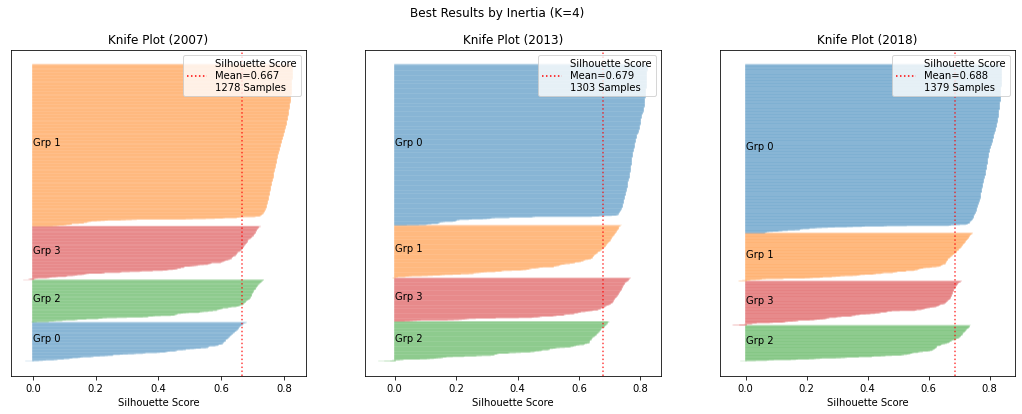

In [12]:
## K=4
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='inertia' and kmDict[key]['K']==4:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Inertia (K=4)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')

#### 3.5.2.2 K=6

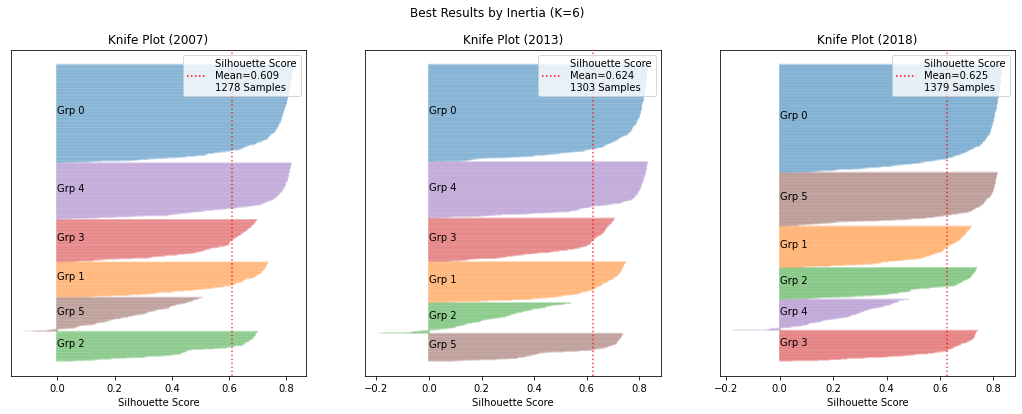

In [13]:
## K=6
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='inertia' and kmDict[key]['K']==6:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Inertia (K=6)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')

#### 3.5.2.3 K=8

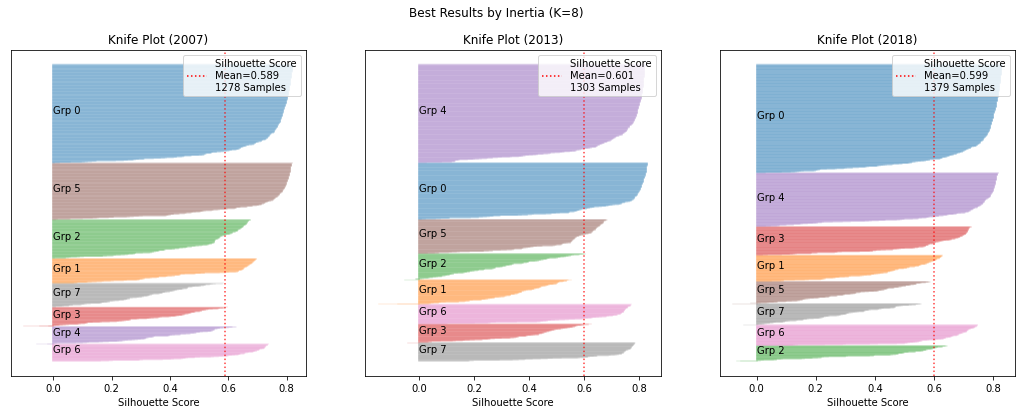

In [14]:
## K=8
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='inertia' and kmDict[key]['K']==8:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Inertia (K=8)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')

#### 3.5.2.4 K=10

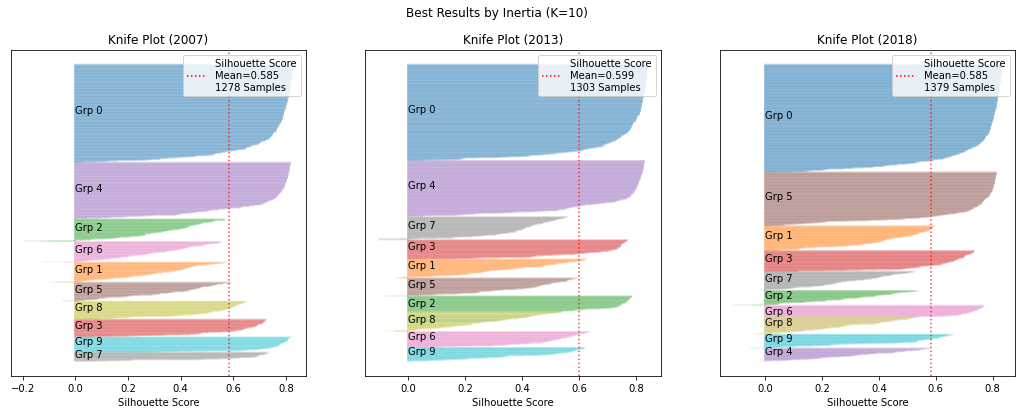

In [15]:
## K=10
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='inertia' and kmDict[key]['K']==10:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Inertia (K=10)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')

### 3.5.3 Metric: Silhouette Score


#### 3.5.3.1 K=4

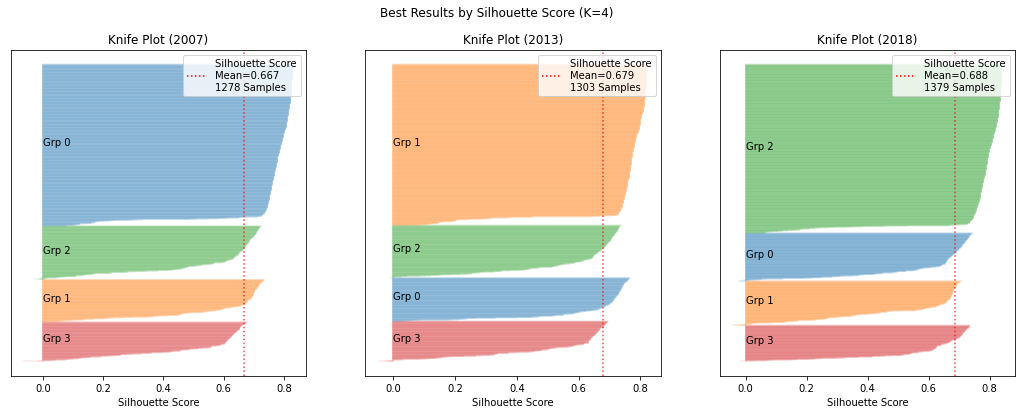

In [16]:
## K=4
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='sil_score' and kmDict[key]['K']==4:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Silhouette Score (K=4)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')


#### 3.5.3.2 K=6

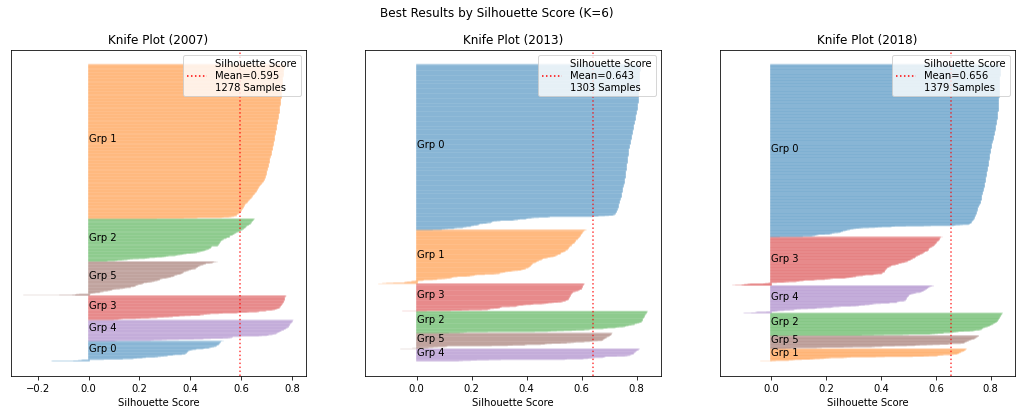

In [17]:
## K=6
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='sil_score' and kmDict[key]['K']==6:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Silhouette Score (K=6)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')


#### 3.5.3.3 K=8

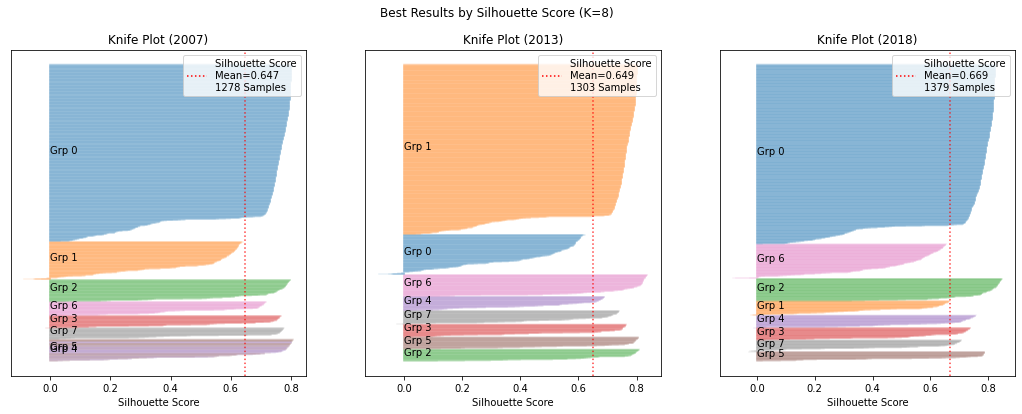

In [18]:
## K=8
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='sil_score' and kmDict[key]['K']==8:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Silhouette Score (K=8)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')


#### 3.5.3.4 K=10

This if the first instance where an obvious difference in the clusters and the silhouette scores may appear. The k-means algorithm is not deterministic and occasionally the 2013 season has split the largest group and redistributed the observations elsewhere. Otherwise, the remaining groups appear similar.

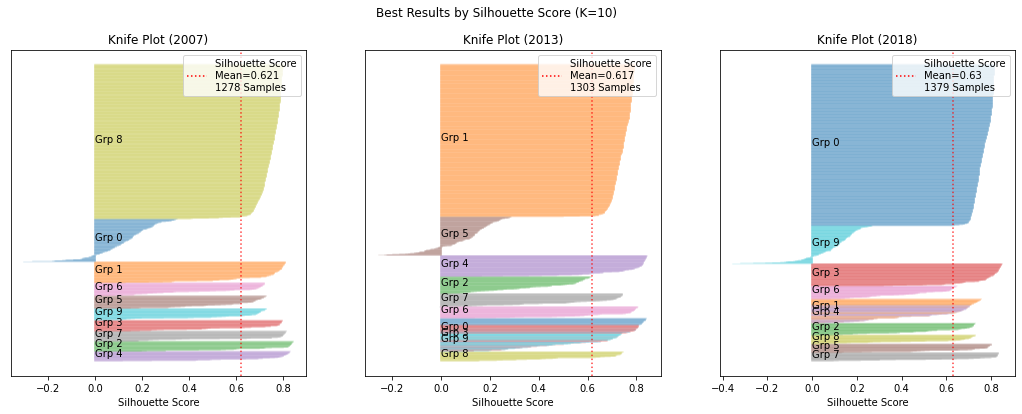

In [19]:
## K=10
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='sil_score' and kmDict[key]['K']==10:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Results by Silhouette Score (K=10)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')

### 3.5.4 Metric: SSmI

- SSmI is silhouette score minus inertia (scaled)
- Gives the largest proportional gap between max silhouette score and minimum inertia
- An ad hoc measurement, but useful in evaluating if the models converge to the same parameterization.

#### 3.5.4.1 K=4

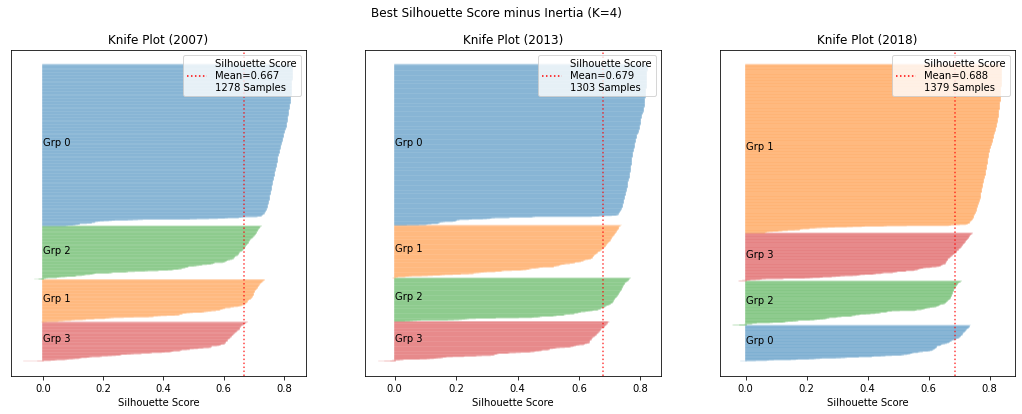

In [20]:
## K=4
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='SSmI' and kmDict[key]['K']==4:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Silhouette Score minus Inertia (K=4)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')


#### 3.5.4.2 K=6

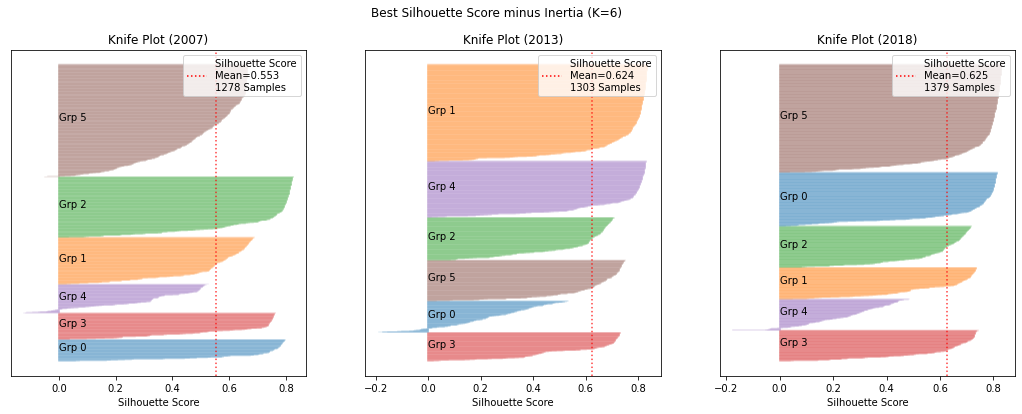

In [21]:
## K=6
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='SSmI' and kmDict[key]['K']==6:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Silhouette Score minus Inertia (K=6)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')


#### 3.5.4.3 K=8

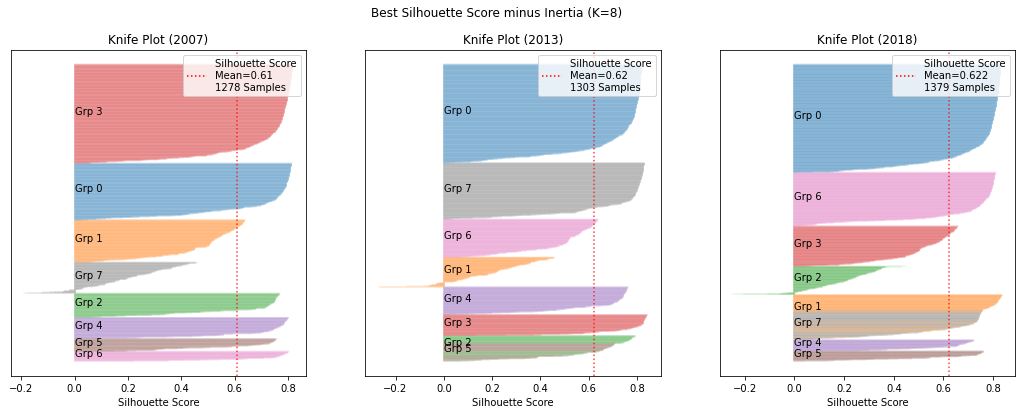

In [22]:
## K=8
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='SSmI' and kmDict[key]['K']==8:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Silhouette Score minus Inertia (K=8)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')


#### 3.5.4.4 K=10

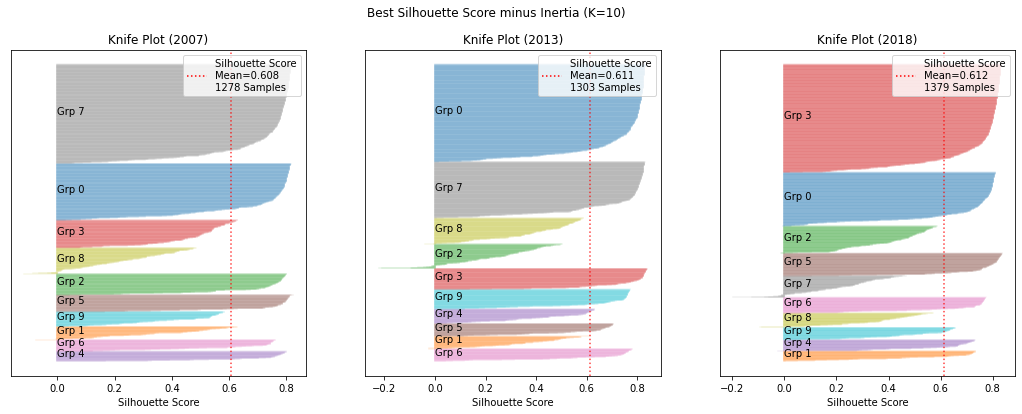

In [23]:
## K=10
keyList = []

for key in kmDict.keys():
        for s in seasons:
            if kmDict[key]['season']==s and kmDict[key]['metric']=='SSmI' and kmDict[key]['K']==10:
                keyList.append(key)

fig = plt.figure(figsize=(18,6))
fig.suptitle('Best Silhouette Score minus Inertia (K=10)')

for i,key in enumerate(keyList):
    ax0 = fig.add_subplot(1,3,i+1)
    _ = knifePlot(kmDict[key]['X'],kmDict[key]['model'],ax0)
    ax0.set_title(f'Knife Plot ({kmDict[key]["season"]})')

Clean house

In [24]:
del(ax0, fig, i, key, keyList, s)

## 3.6 Compare Pairwise PC Plots

To this point, we have compared the diagnostic metrics without comparing the results of the fitted models. Unfortunately, as we have seen with the knife plots, the group label assignments do not necessarily correspond to each other. We will need to reconcile the label assignments from each model. To do this, we need to select one season as an exemplar and adjust the group labels of the other seasons. We will also need a method of quantifying the similarity of the groups between the models. For this, we have defined a convenience function that groups (by label) the principal components from each season's data frame. The means of each group are treated as a vector and the minimum angle between vectors from each data frame determine the new label assignments. This method is crude but reasonably effective and quick.

Once we have reconciled the labels, we will plot each group from each year against the pairwise combinations of the first three PCs. Again, we are looking for any disagreement in the location of the groups by season.


### 3.6.1 Metric: Silhouette Score, K=4

We generate the plot for one instance: $K=4$ with the best silhouette score. The overall location and distribution of the groups are quite similar by season.

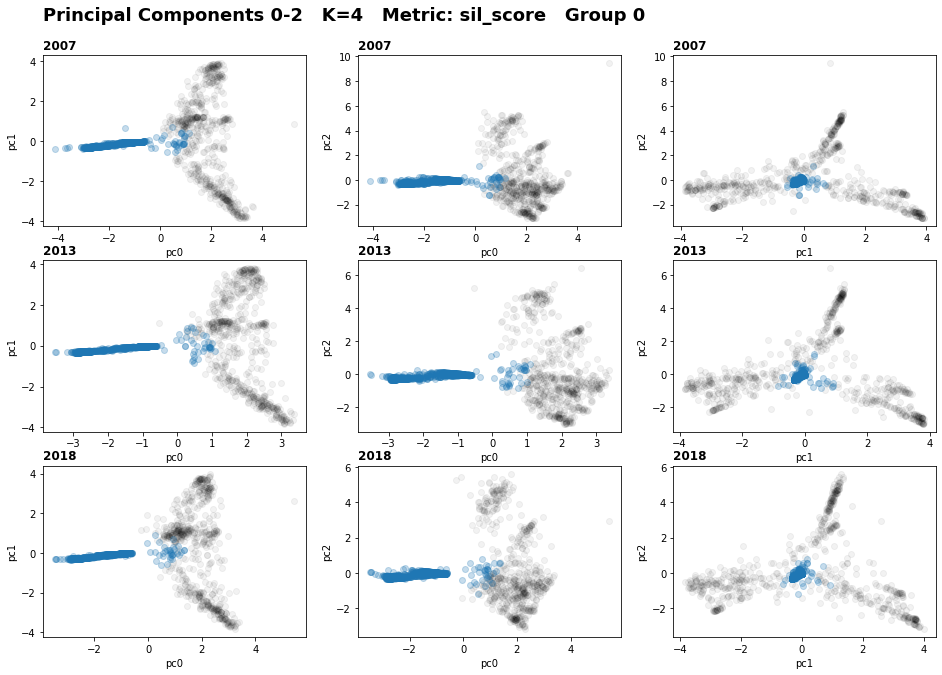

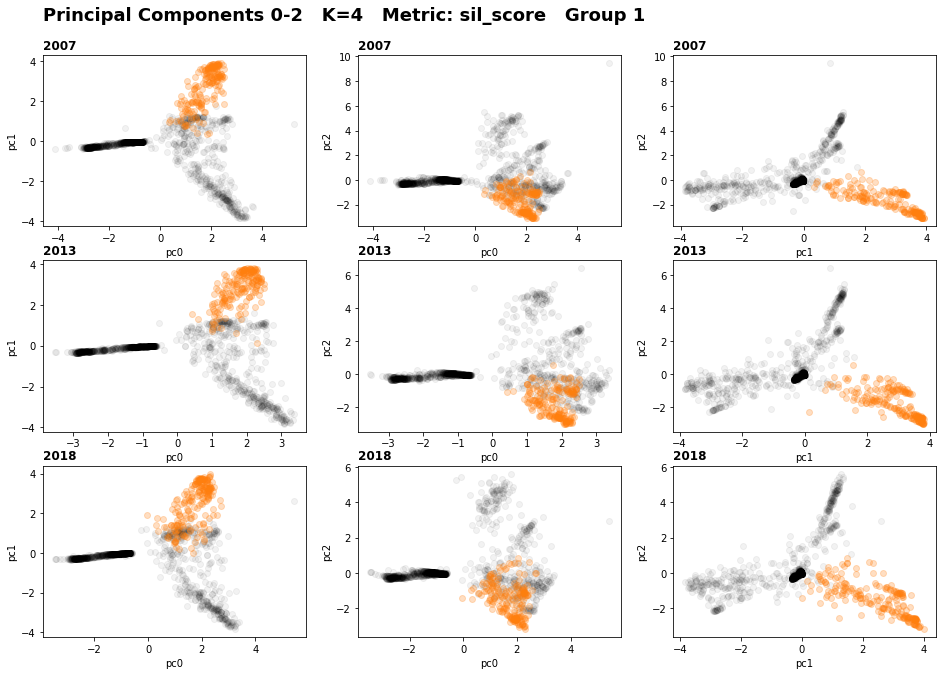

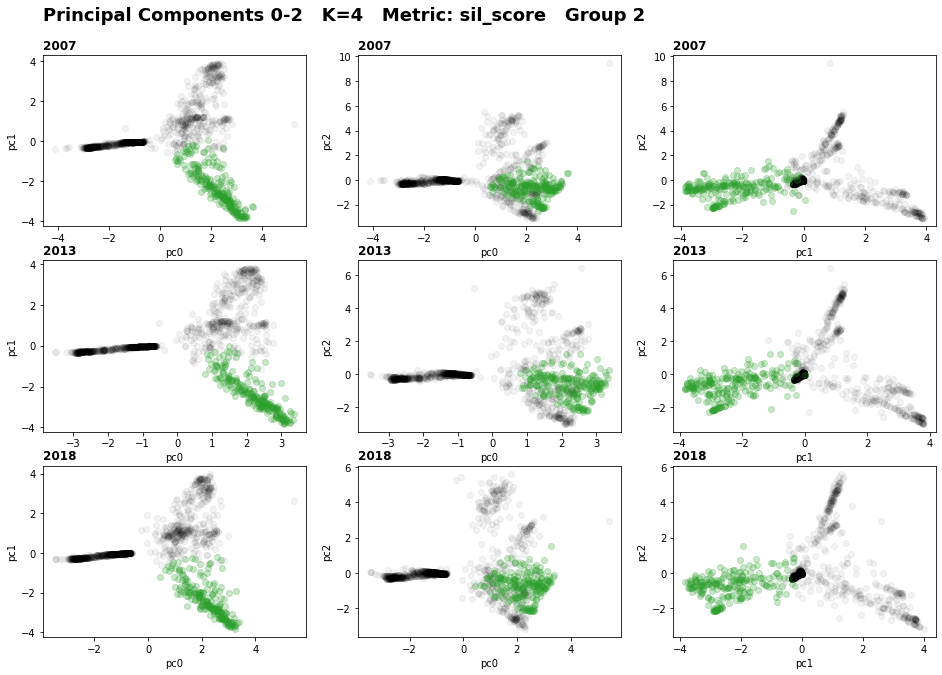

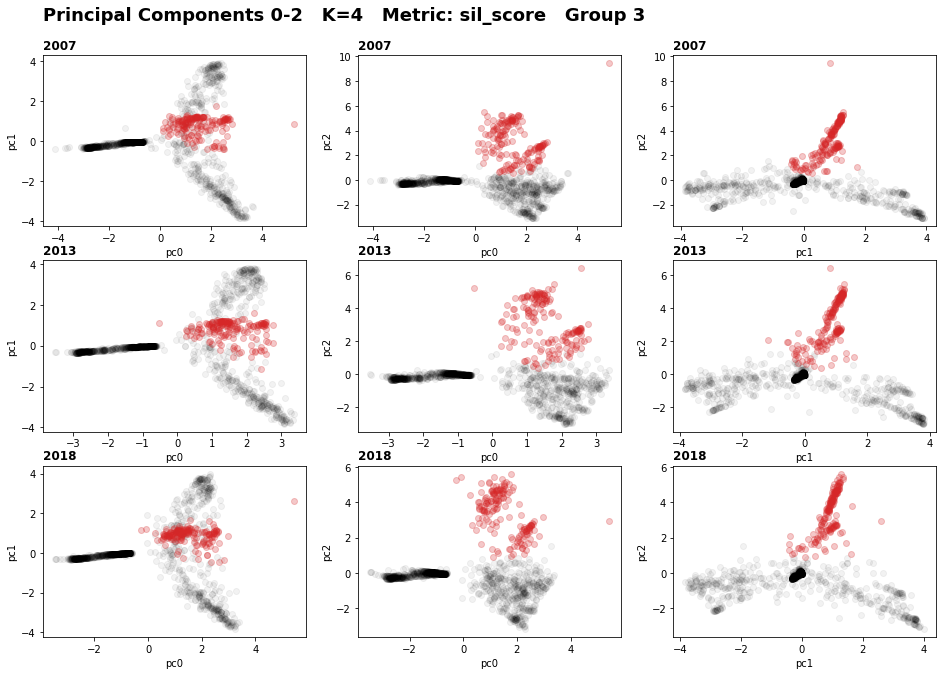

In [25]:
Ks = [4]
metrics = ['sil_score']


for metric in metrics:
    for K in Ks:

        keys = [k for k in kmDict.keys() if kmDict[k]['metric']==metric and kmDict[k]['K']==K]

        for key in keys:
            if kmDict[key]['season']==2007:
                # add labels to 2007 data
                dfTempPC07 = dsDictK[2007]['dfPC'].copy()
                dfTempPC07['labels'] = kmDict[key]['model'].labels_
                dfTemp07 = pd.merge(df0,dfTempPC07['labels'], left_on='playerID',  right_index=True)

            elif kmDict[key]['season']==2013:
                # add labels to 2013 data
                dfTempPC13 = dsDictK[2013]['dfPC'].copy()
                dfTempPC13['labels'] = kmDict[key]['model'].labels_
                dfTemp13 = pd.merge(df1,dfTempPC13['labels'], left_on='playerID',  right_index=True)
                              
            elif kmDict[key]['season']==2018:
                # add labels to 2018 data
                dfTempPC18 = dsDictK[2018]['dfPC'].copy()
                dfTempPC18['labels'] = kmDict[key]['model'].labels_
                dfTemp18 = pd.merge(df2,dfTempPC18['labels'], left_on='playerID',  right_index=True)
               
            else:
                print('Error: season not found')
            
        # reconcile 2013 labels to 2007 labels
        labelDict = reconcileLabels(dfTempPC07,dfTempPC13)
        dfTempPC13['labels'] = dfTempPC13['labels'].replace(labelDict)
        # reconcile 2018 labels to 2007 labels
        labelDict = reconcileLabels(dfTempPC07,dfTempPC18)
        dfTempPC18['labels'] = dfTempPC18['labels'].replace(labelDict)

        # plot pairwise combos of first 3 PCs
        pD = {'cmap':['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:pink', 'orange','tab:cyan','lime','magenta'],
              'df':[dfTempPC07,dfTempPC13,dfTempPC18],
              'L':set(dfTemp07['labels']),
              'season':['2007','2013','2018']}

        for l0 in pD['L']:
            fig = plt.figure(figsize=(16,10.7))
            fig.text(0.125,0.925,
                     f'Principal Components 0-2   K={K}   Metric: {metric}   Group {l0}',
                     fontweight='bold',
                     fontsize=18)
            axes = [fig.add_subplot(3,3,i) for i in range(1,10,1)]

            plotIX = 0

            for i,d in enumerate(pD['df']):
                for x,y in itertools.combinations(['pc0','pc1','pc2'],2):
                    
                    axes[plotIX].scatter(d.loc[d['labels']!=l0,x],
                                         d.loc[d['labels']!=l0,y],
                                         color='black',
                                         alpha=0.05)
                    
                    axes[plotIX].scatter(d.loc[d['labels']==l0,x],
                                         d.loc[d['labels']==l0,y],
                                         color=pD['cmap'][l0],
                                         alpha=0.25)
                    
                    axes[plotIX].set_xlabel(x)
                    axes[plotIX].set_ylabel(y)
                    axes[plotIX].set_title(pD['season'][i],loc='left',fontweight='bold')

                    plotIX += 1

### 3.6.2 All Metrics and Values of $K$

Rather than scrolling through a bunch of plot to scan for anomalies, we can borrow a technique from astronomy: the <a href="https://en.wikipedia.org/wiki/Blink_comparator" >"blink comparator"</a>. The video below compiles all of the plots by value of $k$ and for each metric. 

Visual inspection of the plots says that the results are generally quite consistent, with one exception. For $k=10$ and metric=inertia, the plot reveals an inconsistency among a few of the higher order groups. This is not likely a problem with reconciling the labels; rather it is a problem with the fit. 

In [26]:
# Youtube
display(IFrame(width="1280",
               height="720",
               src="https://www.youtube.com/embed/JiVv3TCIQdU",
               title="YouTube video player",
               frameborder="0",
               allow="accelerometer; clipboard-write; encrypted-media; gyroscope"))

# 4. Conclusion

We have scaled and transformed playing time data from three seasons and fit k-means models to each. The scaling and transformation procedures were performed independently, with respect to the 2007 season, and in aggregate by combine the data frames. The visual evidence seems to suggest that resulting models are very similar under the following conditions:

- The time interval is not so long that a major change in rules or game management philosophy has occurred. If in doubt, look at the scree plots and the pairwise plots of the principal components to identify an appropriate interval.
- The metric is not inertia, and the number of clusters is not greater than 8. This is the only circumstance where there is an obvious problem.

Ideally, whenever possible, combine the data over the given interval and fit the data by season. This will eliminate any errors in reconciling the group labels. If that is not practical, then applying the parameters of a known model to new data should yield reasonable results.
